In [1]:

import pandas as pd

# Load the data
train = pd.read_csv('C:\\Projects\\Kaggle\\playground-series-s5e1\\train.csv')
test = pd.read_csv('C:\\Projects\\Kaggle\\playground-series-s5e1\\test.csv')

# Preview the first few rows
print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())


Train Data:
   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0

Test Data:
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode


In [22]:
if 'num_sold' not in test.columns:
    test['num_sold'] = 0
df = pd.concat([train, test], axis = 0)
df.head()

,id,date,country,store,product,num_sold,is_weekend
0,0,2010-01-01 00:00:00,Canada,Discount Stickers,Holographic Goose,NaN,0.0
1,1,2010-01-01 00:00:00,Canada,Discount Stickers,Kaggle,973.0,0.0
2,2,2010-01-01 00:00:00,Canada,Discount Stickers,Kaggle Tiers,906.0,0.0
3,3,2010-01-01 00:00:00,Canada,Discount Stickers,Kerneler,423.0,0.0
4,4,2010-01-01 00:00:00,Canada,Discount Stickers,Kerneler Dark Mode,491.0,0.0


In [23]:
print("Combined DataFrame Shape:", df.shape)
print(df.info())  # Check column types and non-null counts
print(df.tail())  # Verify the last rows come from the test dataset


Combined DataFrame Shape: (328680, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 328680 entries, 0 to 98549
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          328680 non-null  int64  
 1   date        328680 non-null  object 
 2   country     328680 non-null  object 
 3   store       328680 non-null  object 
 4   product     328680 non-null  object 
 5   num_sold    319809 non-null  float64
 6   is_weekend  230130 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 20.1+ MB
None
           id        date    country                 store  \
98545  328675  2019-12-31  Singapore  Premium Sticker Mart   
98546  328676  2019-12-31  Singapore  Premium Sticker Mart   
98547  328677  2019-12-31  Singapore  Premium Sticker Mart   
98548  328678  2019-12-31  Singapore  Premium Sticker Mart   
98549  328679  2019-12-31  Singapore  Premium Sticker Mart   

                  product  num_sold  is

In [24]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create 'is_weekend' column # 0 for weekdays and 1 for weekend
df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Verify the column
print(df[['date', 'is_weekend']].head())
print("Unique values in 'is_weekend':", df['is_weekend'].unique())



        date  is_weekend
0 2010-01-01           0
1 2010-01-01           0
2 2010-01-01           0
3 2010-01-01           0
4 2010-01-01           0
Unique values in 'is_weekend': [0 1]


In [25]:
print("Combined DataFrame Shape:", df.shape)
print(df.info())  # Check column types and non-null counts
print(df.tail())  # Verify the last rows come from the test dataset


Combined DataFrame Shape: (328680, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 328680 entries, 0 to 98549
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          328680 non-null  int64         
 1   date        328680 non-null  datetime64[ns]
 2   country     328680 non-null  object        
 3   store       328680 non-null  object        
 4   product     328680 non-null  object        
 5   num_sold    319809 non-null  float64       
 6   is_weekend  328680 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 18.8+ MB
None
           id       date    country                 store             product  \
98545  328675 2019-12-31  Singapore  Premium Sticker Mart   Holographic Goose   
98546  328676 2019-12-31  Singapore  Premium Sticker Mart              Kaggle   
98547  328677 2019-12-31  Singapore  Premium Sticker Mart        Kaggle Tiers

In [28]:
unique_years = df['date'].dt.year.unique()
print("Unique years in the dataset:", unique_years)

# Find unique country names
unique_countries = df['country'].unique()

# Print the unique countries
print("Unique countries in the dataset:", unique_countries)


Unique years in the dataset: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Unique countries in the dataset: ['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [30]:
# Define special dates in 'MM-DD' format
special_dates = {
    'Canada': ['01-01', '07-01', '12-25', '12-26', '11-29'],  # New Year, Canada Day, Christmas, Boxing Day, Black Friday
    'Finland': ['01-01', '12-06', '12-24', '06-24'],  # New Year, Independence Day, Christmas Eve, Midsummer
    'Italy': ['01-01', '04-25', '12-25', '08-15'],  # New Year, Liberation Day, Christmas, Ferragosto
    'Kenya': ['01-01', '06-01', '10-20', '12-25'],  # New Year, Madaraka Day, Mashujaa Day, Christmas
    'Norway': ['01-01', '05-17', '06-23', '12-25'],  # New Year, Constitution Day, Midsummer Eve, Christmas
    'Singapore': ['01-01', '02-14', '08-09', '12-25'],  # New Year, Chinese New Year, National Day, Christmas
}
# Function to check if a date is a special day for the given country
def is_special_day(row):
    country = row['country']
    date_md = row['date'].strftime('%m-%d')  # Extract month and day
    if country in special_dates and date_md in special_dates[country]:
        return 1  # Mark as special day
    return 0  # Not a special day


In [31]:

# Apply the function to create 'is_special_day' column
df['is_special_day'] = df.apply(is_special_day, axis=1)

# Verify the column
print("Unique values in 'is_special_day':", df['is_special_day'].unique())
print(df[['date', 'country', 'is_special_day']].head(20))




Unique values in 'is_special_day': [1 0]
         date  country  is_special_day
0  2010-01-01   Canada               1
1  2010-01-01   Canada               1
2  2010-01-01   Canada               1
3  2010-01-01   Canada               1
4  2010-01-01   Canada               1
5  2010-01-01   Canada               1
6  2010-01-01   Canada               1
7  2010-01-01   Canada               1
8  2010-01-01   Canada               1
9  2010-01-01   Canada               1
10 2010-01-01   Canada               1
11 2010-01-01   Canada               1
12 2010-01-01   Canada               1
13 2010-01-01   Canada               1
14 2010-01-01   Canada               1
15 2010-01-01  Finland               1
16 2010-01-01  Finland               1
17 2010-01-01  Finland               1
18 2010-01-01  Finland               1
19 2010-01-01  Finland               1


In [39]:
# Function to assign seasons based on the country and month
def assign_season(row):
    month = row['date'].month
    country = row['country']
    
    # Example for Northern Hemisphere (Canada, Finland, Italy, Norway)
    if country in ['Canada', 'Finland', 'Italy', 'Norway']:
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'
    
    # Example for Equatorial or Southern Hemisphere (Kenya, Singapore)
    elif country in ['Kenya', 'Singapore']:
        if month in [12, 1, 2]:
            return 'Dry'
        elif month in [3, 4, 5]:
            return 'Long Rains'
        elif month in [6, 7, 8]:
            return 'Cool Dry'
        elif month in [9, 10, 11]:
            return 'Short Rains'

# Apply the function to create the 'season' column
df['season'] = df.apply(assign_season, axis=1)

# Verify the column
print("Unique seasons in the dataset:", df['season'].unique())
print(df[['date', 'country', 'season']].head(20))


Unique seasons in the dataset: ['Winter' 'Spring' 'Summer' 'Autumn' 'Dry' 'Long Rains' 'Cool Dry'
 'Short Rains']
           date country  season
0    2010-01-01  Canada  Winter
90   2010-01-02  Canada  Winter
180  2010-01-03  Canada  Winter
270  2010-01-04  Canada  Winter
360  2010-01-05  Canada  Winter
450  2010-01-06  Canada  Winter
540  2010-01-07  Canada  Winter
630  2010-01-08  Canada  Winter
720  2010-01-09  Canada  Winter
810  2010-01-10  Canada  Winter
900  2010-01-11  Canada  Winter
990  2010-01-12  Canada  Winter
1080 2010-01-13  Canada  Winter
1170 2010-01-14  Canada  Winter
1260 2010-01-15  Canada  Winter
1350 2010-01-16  Canada  Winter
1440 2010-01-17  Canada  Winter
1530 2010-01-18  Canada  Winter
1620 2010-01-19  Canada  Winter
1710 2010-01-20  Canada  Winter


In [40]:
import numpy as np

# Extract the day of the week
df['day_of_week'] = df['date'].dt.dayofweek

# Cyclical encoding for day_of_week
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Verify the new features
print(df[['date', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos']].head(10))



          date  day_of_week  day_of_week_sin  day_of_week_cos
0   2010-01-01            4        -0.433884        -0.900969
90  2010-01-02            5        -0.974928        -0.222521
180 2010-01-03            6        -0.781831         0.623490
270 2010-01-04            0         0.000000         1.000000
360 2010-01-05            1         0.781831         0.623490
450 2010-01-06            2         0.974928        -0.222521
540 2010-01-07            3         0.433884        -0.900969
630 2010-01-08            4        -0.433884        -0.900969
720 2010-01-09            5        -0.974928        -0.222521
810 2010-01-10            6        -0.781831         0.623490


In [41]:
# Check unique values
print("Unique values in 'day_of_week':", df['day_of_week'].unique())



Unique values in 'day_of_week': [4 5 6 0 1 2 3]


In [42]:
# Check ranges of the cyclic features
print("Range of 'day_of_week_sin':", df['day_of_week_sin'].min(), "-", df['day_of_week_sin'].max())
print("Range of 'day_of_week_cos':", df['day_of_week_cos'].min(), "-", df['day_of_week_cos'].max())



Range of 'day_of_week_sin': -0.9749279121818236 - 0.9749279121818236
Range of 'day_of_week_cos': -0.9009688679024191 - 1.0


In [43]:
# View sample rows
print(df[['date', 'day_of_week', 'day_of_week_sin', 'day_of_week_cos']].sample(10))


             date  day_of_week  day_of_week_sin  day_of_week_cos
90059  2012-09-27            3         0.433884        -0.900969
56798  2018-09-24            0         0.000000         1.000000
131017 2013-12-26            3         0.433884        -0.900969
222211 2016-10-05            2         0.974928        -0.222521
201969 2016-02-23            1         0.781831         0.623490
217883 2016-08-17            2         0.974928        -0.222521
37613  2018-02-22            3         0.433884        -0.900969
74094  2019-04-04            3         0.433884        -0.900969
180224 2015-06-26            4        -0.433884        -0.900969
180766 2015-07-02            3         0.433884        -0.900969


In [44]:
# Define public holidays as a dictionary
public_holidays = {
    'Canada': ['01-01', '07-01', '12-25', '12-26'],
    'Finland': ['01-01', '12-06', '12-24', '06-24'],
    'Italy': ['01-01', '04-25', '12-25', '08-15'],
    'Kenya': ['01-01', '06-01', '10-20', '12-25'],
    'Norway': ['01-01', '05-17', '06-23', '12-25'],
    'Singapore': ['01-01', '02-14', '08-09', '12-25']
}

# Convert holidays to a DataFrame
holiday_df = []
for country, dates in public_holidays.items():
    for md in dates:
        holiday_df.append({'country': country, 'month_day': md})
holiday_df = pd.DataFrame(holiday_df)


In [45]:
# Extract 'month-day' from date for matching
df['month_day'] = df['date'].dt.strftime('%m-%d')

# Initialize proximity columns
df['days_until_holiday'] = float('inf')  # Default to large value
df['days_since_holiday'] = float('inf')

# Iterate through each country and match holidays
for country in public_holidays.keys():
    # Filter dataset for the current country
    country_df = df[df['country'] == country]
    
    # Get holidays for the current country
    holidays = [pd.to_datetime(f"{year}-{md}") for year in range(2010, 2020) for md in public_holidays[country]]
    
    for date in country_df['date']:
        # Calculate days until and since each holiday
        days_until = [(holiday - date).days for holiday in holidays if holiday >= date]
        days_since = [(date - holiday).days for holiday in holidays if holiday <= date]
        
        # Assign the minimum days until/since
        df.loc[df['date'] == date, 'days_until_holiday'] = min(days_until, default=float('inf'))
        df.loc[df['date'] == date, 'days_since_holiday'] = min(days_since, default=float('inf'))


In [46]:
# View sample rows for validation
print(df[['date', 'country', 'month_day', 'days_until_holiday', 'days_since_holiday']].sample(10))


             date    country month_day  days_until_holiday  days_since_holiday
171988 2015-03-26  Singapore     03-26               136.0                40.0
94598  2012-11-17     Canada     11-17                38.0               100.0
71666  2012-03-07    Finland     03-07               155.0                22.0
42031  2011-04-13     Canada     04-13               118.0                58.0
85132  2019-08-04  Singapore     08-04                 5.0               171.0
163224 2014-12-19      Kenya     12-19                 6.0               132.0
125080 2013-10-21     Norway     10-21                65.0                73.0
212526 2016-06-19      Italy     06-19                51.0               126.0
208345 2016-05-03  Singapore     05-03                98.0                79.0
61796  2011-11-18      Kenya     11-18                37.0               101.0


In [47]:
# Create the country-product interaction feature
df['country_product_interaction'] = df['country'] + "_" + df['product']

# Verify the new feature
print("Country-Product Interaction Feature:")
print(df[['country', 'product', 'country_product_interaction']].head(10))


Country-Product Interaction Feature:
    country            product country_product_interaction
0    Canada  Holographic Goose    Canada_Holographic Goose
90   Canada  Holographic Goose    Canada_Holographic Goose
180  Canada  Holographic Goose    Canada_Holographic Goose
270  Canada  Holographic Goose    Canada_Holographic Goose
360  Canada  Holographic Goose    Canada_Holographic Goose
450  Canada  Holographic Goose    Canada_Holographic Goose
540  Canada  Holographic Goose    Canada_Holographic Goose
630  Canada  Holographic Goose    Canada_Holographic Goose
720  Canada  Holographic Goose    Canada_Holographic Goose
810  Canada  Holographic Goose    Canada_Holographic Goose


In [49]:
# Check unique values in country-product interaction
print("Unique Country-Product Interactions:", df['country_product_interaction'].nunique())

# Sample rows to ensure proper feature creation
print(df[['country', 'product', 'country_product_interaction']].sample(10))



Unique Country-Product Interactions: 30
       country             product country_product_interaction
108343  Norway            Kerneler             Norway_Kerneler
92210    Kenya   Holographic Goose     Kenya_Holographic Goose
183602  Canada        Kaggle Tiers         Canada_Kaggle Tiers
55143   Norway            Kerneler             Norway_Kerneler
17791   Norway              Kaggle               Norway_Kaggle
192939  Norway  Kerneler Dark Mode   Norway_Kerneler Dark Mode
6878     Italy            Kerneler              Italy_Kerneler
45146    Kenya              Kaggle                Kenya_Kaggle
136399   Kenya  Kerneler Dark Mode    Kenya_Kerneler Dark Mode
96753   Canada            Kerneler             Canada_Kerneler


In [51]:
# Columns to remove
columns_to_remove = [
    'lag_1', 'lag_7', 'lag_30',
    'rolling_mean_7', 'rolling_std_7',
    'rolling_mean_30', 'rolling_std_30',
    'sales_days_until_holiday'
]

# Drop the columns
df = df.drop(columns=columns_to_remove, axis=1)

# Verify the columns are removed
print("Remaining Columns in the Dataset:")
print(df.columns)


Remaining Columns in the Dataset:
Index(['id', 'date', 'country', 'store', 'product', 'num_sold', 'is_weekend',
       'is_special_day', 'season', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_day', 'days_until_holiday',
       'days_since_holiday', 'country_product_interaction',
       'sales_days_since_holiday'],
      dtype='object')


In [54]:
df = df.drop(columns="sales_days_since_holiday",axis=1)

In [55]:
print(df.columns)

Index(['id', 'date', 'country', 'store', 'product', 'num_sold', 'is_weekend',
       'is_special_day', 'season', 'day_of_week', 'day_of_week_sin',
       'day_of_week_cos', 'month_day', 'days_until_holiday',
       'days_since_holiday', 'country_product_interaction'],
      dtype='object')


In [57]:
# Check for null values in the dataset
print("Null Values in the Dataset:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

Null Values in the Dataset:
id                                0
date                              0
country                           0
store                             0
product                           0
num_sold                       8871
is_weekend                        0
is_special_day                    0
season                            0
day_of_week                       0
day_of_week_sin                   0
day_of_week_cos                   0
month_day                         0
days_until_holiday                0
days_since_holiday                0
country_product_interaction       0
dtype: int64

Percentage of Missing Values:
id                             0.000000
date                           0.000000
country                        0.000000
store                          0.000000
product                        0.000000
num_sold                       2.698978
is_weekend                     0.000000
is_special_day                 0.000000
season                         0

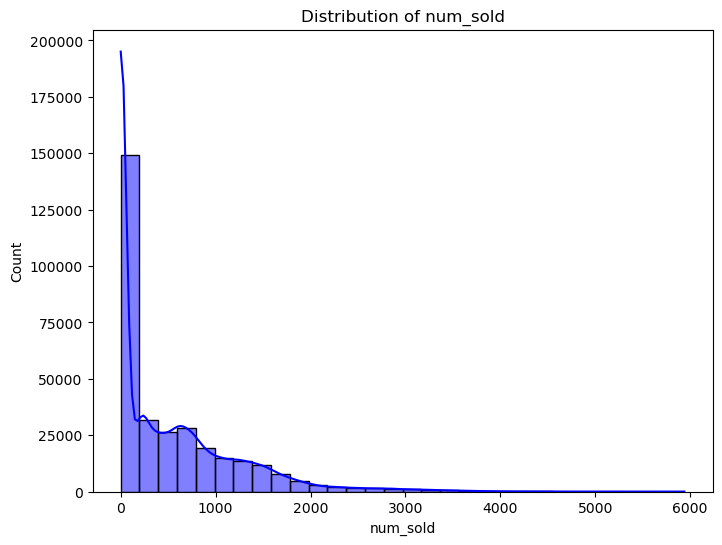

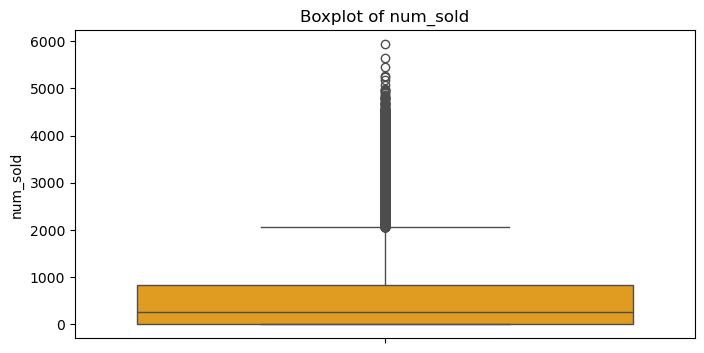

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['num_sold'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of num_sold')
plt.show()

# Plot boxplot to check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(df['num_sold'].dropna(), color='orange')
plt.title('Boxplot of num_sold')
plt.show()


In [59]:
mean_value = df['num_sold'].mean()
median_value = df['num_sold'].median()
mode_value = df['num_sold'].mode()[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")


Mean: 520.6340534506534
Median: 248.0
Mode: 0.0


Recommended Imputation Method
Given the skewed distribution:

Median is the best choice:
It is robust to outliers and better reflects the central tendency of the majority of the data.

In [61]:
# Impute missing num_sold values with the median within each group
df['num_sold'] = df.groupby(['country', 'store', 'product'])['num_sold'].transform(
    lambda x: x.fillna(x.median())
)

# Verify if any null values remain
print(f"Remaining null values in num_sold: {df['num_sold'].isnull().sum()}")



Remaining null values in num_sold: 0


In [62]:
# Calculate the median num_sold for each group
group_medians = df.groupby(['country', 'store', 'product'])['num_sold'].median()

# Display a few sample groups and their medians
print("Sample Grouped Medians:")
print(group_medians.head(10))


Sample Grouped Medians:
country  store                 product           
Canada   Discount Stickers     Holographic Goose      248.0
                               Kaggle                 654.0
                               Kaggle Tiers           541.5
                               Kerneler               286.0
                               Kerneler Dark Mode     326.0
         Premium Sticker Mart  Holographic Goose      229.0
                               Kaggle                1564.5
                               Kaggle Tiers          1295.0
                               Kerneler               683.0
                               Kerneler Dark Mode     783.0
Name: num_sold, dtype: float64


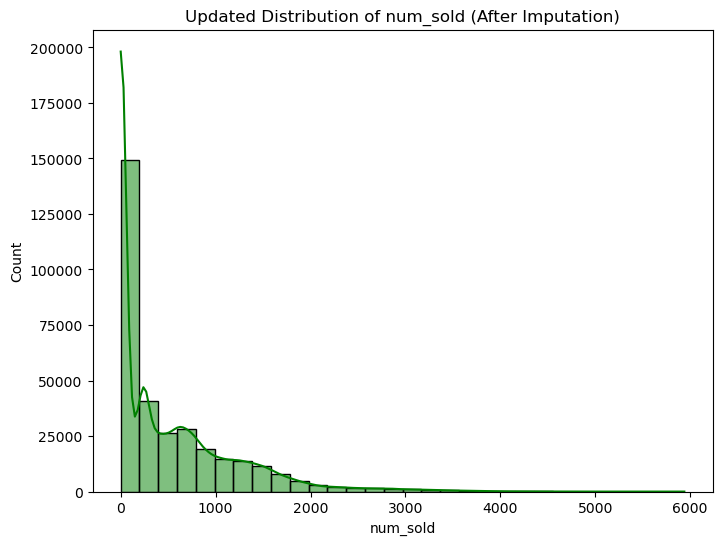

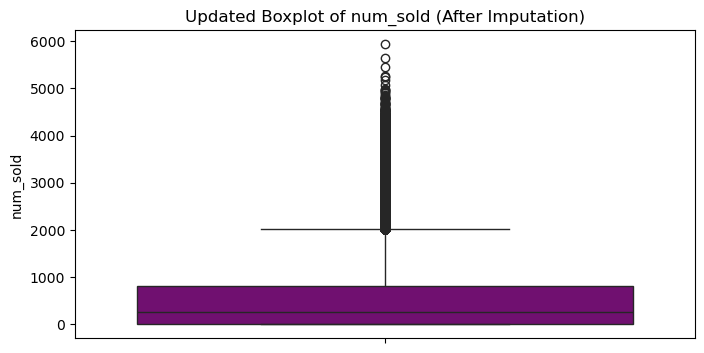

In [63]:
# Plot the updated histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['num_sold'], kde=True, bins=30, color='green')
plt.title('Updated Distribution of num_sold (After Imputation)')
plt.show()

# Plot the updated boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(df['num_sold'], color='purple')
plt.title('Updated Boxplot of num_sold (After Imputation)')
plt.show()


In [64]:
print(f"Remaining null values in num_sold: {df['num_sold'].isnull().sum()}")


Remaining null values in num_sold: 0


In [75]:
# Check for infinite values in the columns
inf_check = df[['days_until_holiday', 'days_since_holiday']].applymap(lambda x: x == float('inf') or x == float('-inf'))

# Display rows with infinite values
print("Rows with Infinite Values:")
print(df[inf_check.any(axis=1)])

# Replace infinite values with a default
df['days_until_holiday'] = df['days_until_holiday'].replace([float('inf'), float('-inf')], 365)
df['days_since_holiday'] = df['days_since_holiday'].replace([float('inf'), float('-inf')], 365)



C:\Users\sachi\AppData\Local\Temp\ipykernel_23776\4086571256.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_check = df[['days_until_holiday', 'days_since_holiday']].applymap(lambda x: x == float('inf') or x == float('-inf'))


Rows with Infinite Values:
           id       date    country              store             product  \
98010  328140 2019-12-26     Canada  Discount Stickers   Holographic Goose   
98100  328230 2019-12-27     Canada  Discount Stickers   Holographic Goose   
98190  328320 2019-12-28     Canada  Discount Stickers   Holographic Goose   
98280  328410 2019-12-29     Canada  Discount Stickers   Holographic Goose   
98370  328500 2019-12-30     Canada  Discount Stickers   Holographic Goose   
...       ...        ...        ...                ...                 ...   
98184  328314 2019-12-27  Singapore  Stickers for Less  Kerneler Dark Mode   
98274  328404 2019-12-28  Singapore  Stickers for Less  Kerneler Dark Mode   
98364  328494 2019-12-29  Singapore  Stickers for Less  Kerneler Dark Mode   
98454  328584 2019-12-30  Singapore  Stickers for Less  Kerneler Dark Mode   
98544  328674 2019-12-31  Singapore  Stickers for Less  Kerneler Dark Mode   

       num_sold  is_weekend  is_spec

In [76]:
# Check for NaN values in the columns
print("Missing Values in 'days_until_holiday':", df['days_until_holiday'].isnull().sum())
print("Missing Values in 'days_since_holiday':", df['days_since_holiday'].isnull().sum())


Missing Values in 'days_until_holiday': 0
Missing Values in 'days_since_holiday': 0


In [78]:
# Check the range of values in the columns
print("Range of 'days_until_holiday':", df['days_until_holiday'].min(), "-", df['days_until_holiday'].max())
print("Range of 'days_since_holiday':", df['days_since_holiday'].min(), "-", df['days_since_holiday'].max())


Range of 'days_until_holiday': 0.0 - 365.0
Range of 'days_since_holiday': 0.0 - 176.0


In [109]:
from sklearn.preprocessing import LabelEncoder

# Convert 'season' to numerical values using LabelEncoder
le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])


In [110]:
training_data = df[0:len(train)]
testing_data = df[len(train):]

training_data


,id,date,country,store,product,num_sold,is_weekend,is_special_day,season,day_of_week,day_of_week_sin,day_of_week_cos,month_day,days_until_holiday,days_since_holiday,country_product_interaction
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,248.0,0,1,7,4,-0.433884,-0.900969,01-01,0.0,0.0,Canada_Holographic Goose
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,248.0,1,0,7,5,-0.974928,-0.222521,01-02,43.0,1.0,Canada_Holographic Goose
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,248.0,1,0,7,6,-0.781831,0.623490,01-03,42.0,2.0,Canada_Holographic Goose
270,270,2010-01-04,Canada,Discount Stickers,Holographic Goose,248.0,0,0,7,0,0.000000,1.000000,01-04,41.0,3.0,Canada_Holographic Goose
360,360,2010-01-05,Canada,Discount Stickers,Holographic Goose,248.0,0,0,7,1,0.781831,0.623490,01-05,40.0,4.0,Canada_Holographic Goose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,4473,2010-02-19,Norway,Discount Stickers,Kerneler,445.0,0,0,7,4,-0.433884,-0.900969,02-19,171.0,5.0,Norway_Kerneler
4563,4563,2010-02-20,Norway,Discount Stickers,Kerneler,541.0,1,0,7,5,-0.974928,-0.222521,02-20,170.0,6.0,Norway_Kerneler
4653,4653,2010-02-21,Norway,Discount Stickers,Kerneler,555.0,1,0,7,6,-0.781831,0.623490,02-21,169.0,7.0,Norway_Kerneler
4743,4743,2010-02-22,Norway,Discount Stickers,Kerneler,489.0,0,0,7,0,0.000000,1.000000,02-22,168.0,8.0,Norway_Kerneler


In [111]:
testing_data = testing_data.drop(columns='num_sold')

In [112]:
print(f"Train shape: {training_data.shape}, Test shape: {testing_data.shape}")


Train shape: (230130, 16), Test shape: (98550, 15)


In [113]:
# List of categorical columns to target encode
categorical_columns = ['country', 'store', 'product', 'country_product_interaction']

# Apply target encoding to the training set
for col in categorical_columns:
    # Compute the mean num_sold for each category in the training set
    target_mean = training_data.groupby(col)['num_sold'].mean()
    
    # Map the mean to the training set
    training_data[f'{col}_encoded'] = training_data[col].map(target_mean)

# Verify the encoded columns
print("Target Encoded Columns in Training Data:")
print(training_data[[f'{col}_encoded' for col in categorical_columns]].head())


Target Encoded Columns in Training Data:
     country_encoded  store_encoded  product_encoded  \
0         542.280084     266.988245       123.256782   
90        542.280084     266.988245       123.256782   
180       542.280084     266.988245       123.256782   
270       542.280084     266.988245       123.256782   
360       542.280084     266.988245       123.256782   

     country_product_interaction_encoded  
0                             171.529755  
90                            171.529755  
180                           171.529755  
270                           171.529755  
360                           171.529755  


C:\Users\sachi\AppData\Local\Temp\ipykernel_23776\1849437313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[f'{col}_encoded'] = training_data[col].map(target_mean)
C:\Users\sachi\AppData\Local\Temp\ipykernel_23776\1849437313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[f'{col}_encoded'] = training_data[col].map(target_mean)
C:\Users\sachi\AppData\Local\Temp\ipykernel_23776\1849437313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [114]:
# Global mean for handling unseen categories
global_mean = training_data['num_sold'].mean()

# Apply target encoding to the test set
for col in categorical_columns:
    # Map the training set means to the test set
    testing_data[f'{col}_encoded'] = testing_data[col].map(target_mean).fillna(global_mean)

# Verify the encoded columns in the test set
print("Encoded Columns in Testing Data:")
print(testing_data[[f'{col}_encoded' for col in categorical_columns]].head())


Encoded Columns in Testing Data:
      country_encoded  store_encoded  product_encoded  \
4923       381.504502     381.504502       381.504502   
5013       381.504502     381.504502       381.504502   
5103       381.504502     381.504502       381.504502   
5193       381.504502     381.504502       381.504502   
5283       381.504502     381.504502       381.504502   

      country_product_interaction_encoded  
4923                           520.240741  
5013                           520.240741  
5103                           520.240741  
5193                           520.240741  
5283                           520.240741  


In [115]:
# Example: Verify target encoding for 'country' in training data
print("Mean num_sold by country in training data:")
print(training_data.groupby('country')['num_sold'].mean())

# Compare with encoded values
print(training_data[['country', 'country_encoded']].drop_duplicates().head())


Mean num_sold by country in training data:
country
Canada     542.280084
Finland    523.893246
Italy      379.658069
Kenya       33.518456
Norway     613.700817
Name: num_sold, dtype: float64
    country  country_encoded
0    Canada       542.280084
15  Finland       523.893246
30    Italy       379.658069
45    Kenya        33.518456
60   Norway       613.700817


In [116]:
# Check for null values in the encoded columns
encoded_columns = [f'{col}_encoded' for col in categorical_columns]
print("Null Values in Encoded Columns (Training Data):")
print(training_data[encoded_columns].isnull().sum())

print("Null Values in Encoded Columns (Testing Data):")
print(testing_data[encoded_columns].isnull().sum())


Null Values in Encoded Columns (Training Data):
country_encoded                        0
store_encoded                          0
product_encoded                        0
country_product_interaction_encoded    0
dtype: int64
Null Values in Encoded Columns (Testing Data):
country_encoded                        0
store_encoded                          0
product_encoded                        0
country_product_interaction_encoded    0
dtype: int64


In [117]:
# Define the complete feature list
features = [
    # Target-encoded features
    'country_encoded', 'store_encoded', 'product_encoded', 'country_product_interaction_encoded',

    # Engineered numerical features
    'is_weekend', 'days_until_holiday', 'days_since_holiday', 'season',

    # Temporal features (cyclic encoding for day of the week)
    'day_of_week_sin', 'day_of_week_cos',
    
    # Add lag/rolling features if already created
    # 'lag_7', 'rolling_mean_7', 'rolling_mean_30', etc.
]

# Prepare feature and target sets for training
X_train = training_data[features]
y_train = training_data['num_sold']

X_test = testing_data[features]  # Test data does not have 'num_sold'
X_test


,country_encoded,store_encoded,product_encoded,country_product_interaction_encoded,is_weekend,days_until_holiday,days_since_holiday,season,day_of_week_sin,day_of_week_cos
4923,381.504502,381.504502,381.504502,520.240741,0,166.0,10.0,7,0.974928,-0.222521
5013,381.504502,381.504502,381.504502,520.240741,0,165.0,11.0,7,0.433884,-0.900969
5103,381.504502,381.504502,381.504502,520.240741,0,164.0,12.0,7,-0.433884,-0.900969
5193,381.504502,381.504502,381.504502,520.240741,1,163.0,13.0,7,-0.974928,-0.222521
5283,381.504502,381.504502,381.504502,520.240741,1,162.0,14.0,7,-0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...
98184,381.504502,381.504502,381.504502,381.504502,0,365.0,2.0,2,-0.433884,-0.900969
98274,381.504502,381.504502,381.504502,381.504502,1,365.0,3.0,2,-0.974928,-0.222521
98364,381.504502,381.504502,381.504502,381.504502,1,365.0,4.0,2,-0.781831,0.623490
98454,381.504502,381.504502,381.504502,381.504502,0,365.0,5.0,2,0.000000,1.000000


In [118]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the shapes
print(f"Training set: {X_train_split.shape}, Validation set: {X_val.shape}")


Training set: (184104, 10), Validation set: (46026, 10)


Training set shape: (184104, 10), Validation set shape: (46026, 10)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 184104, number of used features: 10
[LightGBM] [Info] Start training from score 381.514877
Validation MAPE: 36301726942791282688.00%
Predictions saved to submission.csv!


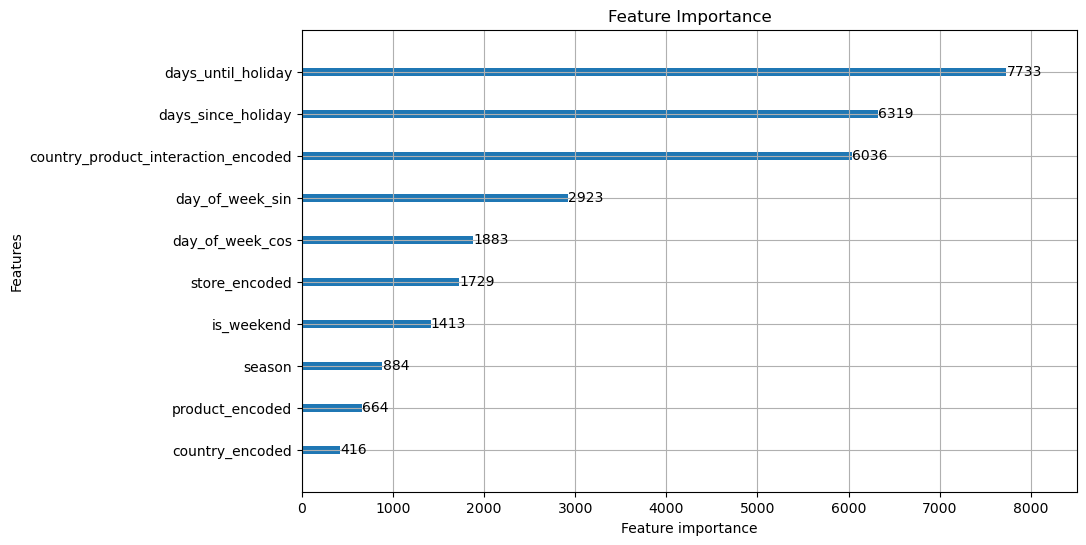

In [119]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the Features and Target
features = [
    # Target-encoded features
    'country_encoded', 'store_encoded', 'product_encoded', 'country_product_interaction_encoded',

    # Engineered numerical features
    'is_weekend', 'days_until_holiday', 'days_since_holiday', 'season',

    # Temporal features (cyclic encoding for day of the week)
    'day_of_week_sin', 'day_of_week_cos',
    
    # Add any lag/rolling features if applicable
    # 'lag_7', 'rolling_mean_7', 'rolling_mean_30', etc.
]

target = 'num_sold'

X_train = training_data[features]
y_train = training_data[target]
X_test = testing_data[features]  # Test set does not have 'num_sold'

# Step 2: Split the Training Data into Training and Validation Sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train_split.shape}, Validation set shape: {X_val.shape}")

# Step 3: Initialize and Train LGBMRegressor
model = lgb.LGBMRegressor(
    objective='regression',         # Regression task
    metric='mape',                  # Mean Absolute Percentage Error
    random_state=42,                # Random seed for reproducibility
    learning_rate=0.1,              # Learning rate
    n_estimators=1000,              # Maximum number of boosting iterations
    max_depth=7                     # Maximum depth of each tree
)

# Train the model with early stopping
model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val, y_val)],      # Validation set for monitoring
    eval_metric='mape'            # Validation metric
           # Stop if no improvement after 50 rounds
                    # Log progress every 10 rounds
)

# Step 4: Validate the Model
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model's performance
mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Validation MAPE: {mape * 100:.2f}%")

# Step 5: Predict on the Test Set
# Predict the target variable (num_sold) for the test set
test_predictions = model.predict(X_test)
# Save predictions to a submission file
testing_data['num_sold_pred'] = test_predictions
testing_data[['id', 'num_sold_pred']].rename(columns={'num_sold_pred': 'num_sold'}).to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv!")

# Optional: Feature Importance
# Plot feature importance
lgb.plot_importance(model, importance_type='split', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()



In [122]:
# Use the index from testing_data as the id column in the submission
submission = pd.DataFrame({
    'id':   test['id'],       # Use 'id' column from testing_data
     # Use index from testing_data
    'num_sold': test_predictions    # Predictions from the model
})

# Save the submission file
submission.to_csv('submission123.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
